# KNN - K nearest neighbour

In [75]:
from sklearn.datasets import load_wine
import pandas as pd

wine = load_wine()
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [76]:
wine["feature_names"], wine["target_names"], wine["target"]


(['alcohol',
  'malic_acid',
  'ash',
  'alcalinity_of_ash',
  'magnesium',
  'total_phenols',
  'flavanoids',
  'nonflavanoid_phenols',
  'proanthocyanins',
  'color_intensity',
  'hue',
  'od280/od315_of_diluted_wines',
  'proline'],
 array(['class_0', 'class_1', 'class_2'], dtype='<U7'),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2]))

In [97]:
df = pd.DataFrame(wine["data"], columns=wine["feature_names"])
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [98]:
df["target"] = wine["target"]
df.head()
# eller
# df_wine_classes = pd.DataFrame(wine["target"], columns=["wine_class"])
# pd.concat([df, df_wine_classes], axis=1)

# df_wine_classes.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [99]:
df.info(), df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

(None, (178, 14))

In [80]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


<Axes: >

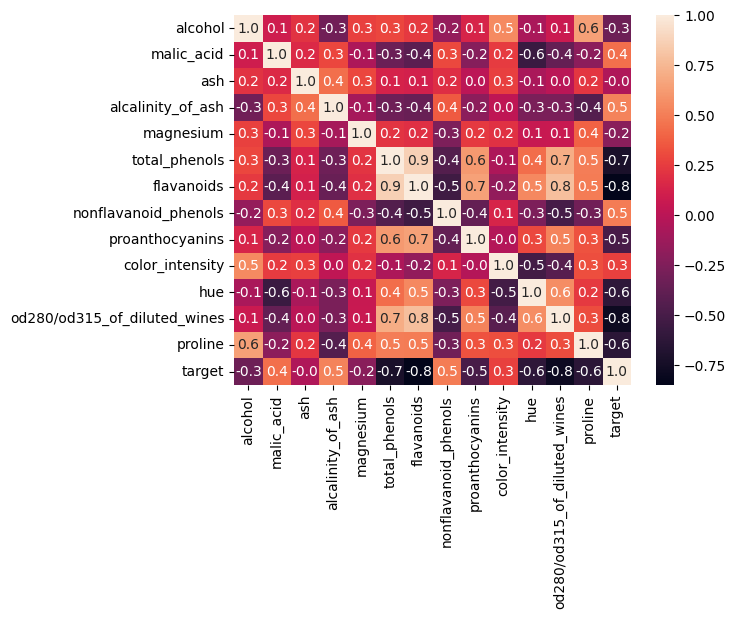

In [100]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True, fmt=".1f")

<Axes: >

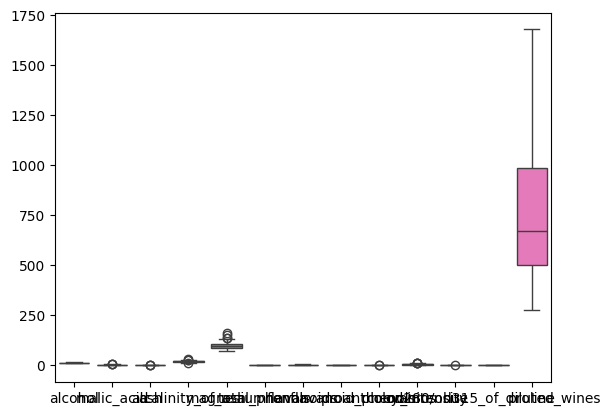

In [82]:
import matplotlib.pyplot as plt
# plt.figure(figsize=(10,5))
sns.boxplot(df)
# plt.xticks(rotation=35)

<Axes: >

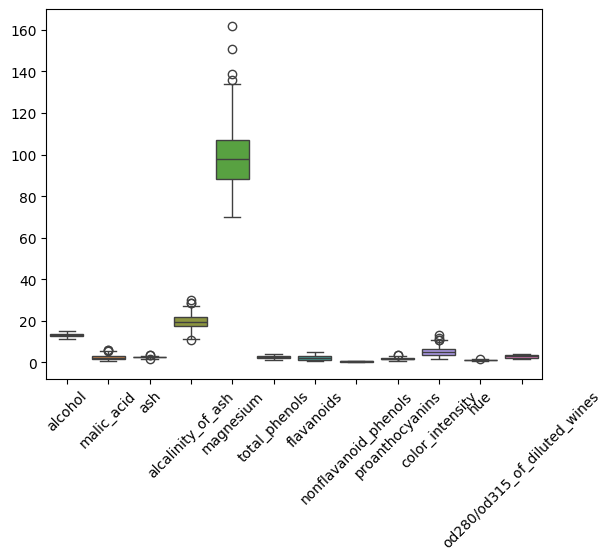

In [83]:
plt.xticks(rotation=45)
sns.boxplot(df.drop(columns="proline"))

<Axes: >

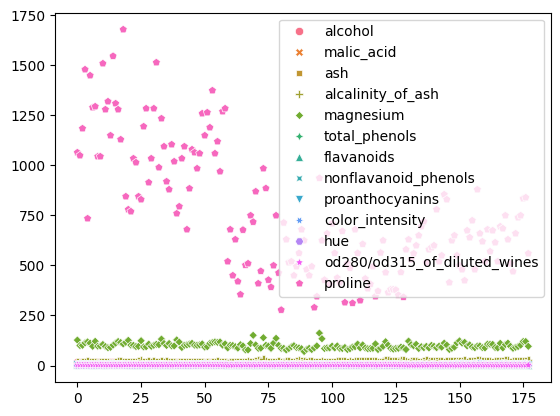

In [84]:
sns.scatterplot(df)

<Axes: >

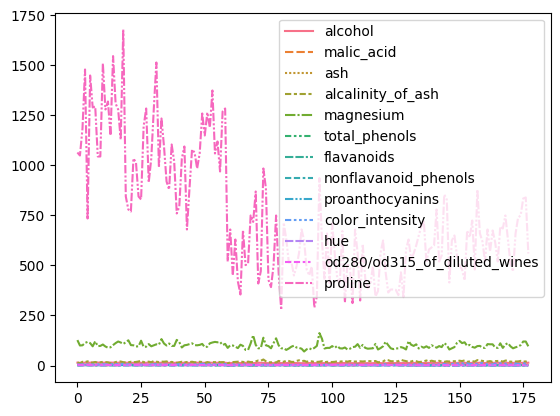

In [85]:
sns.lineplot(df)

In [86]:
print(wine["DESCR"])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

## EDA med lärare
### - feature selection/ feature engineering

<Axes: >

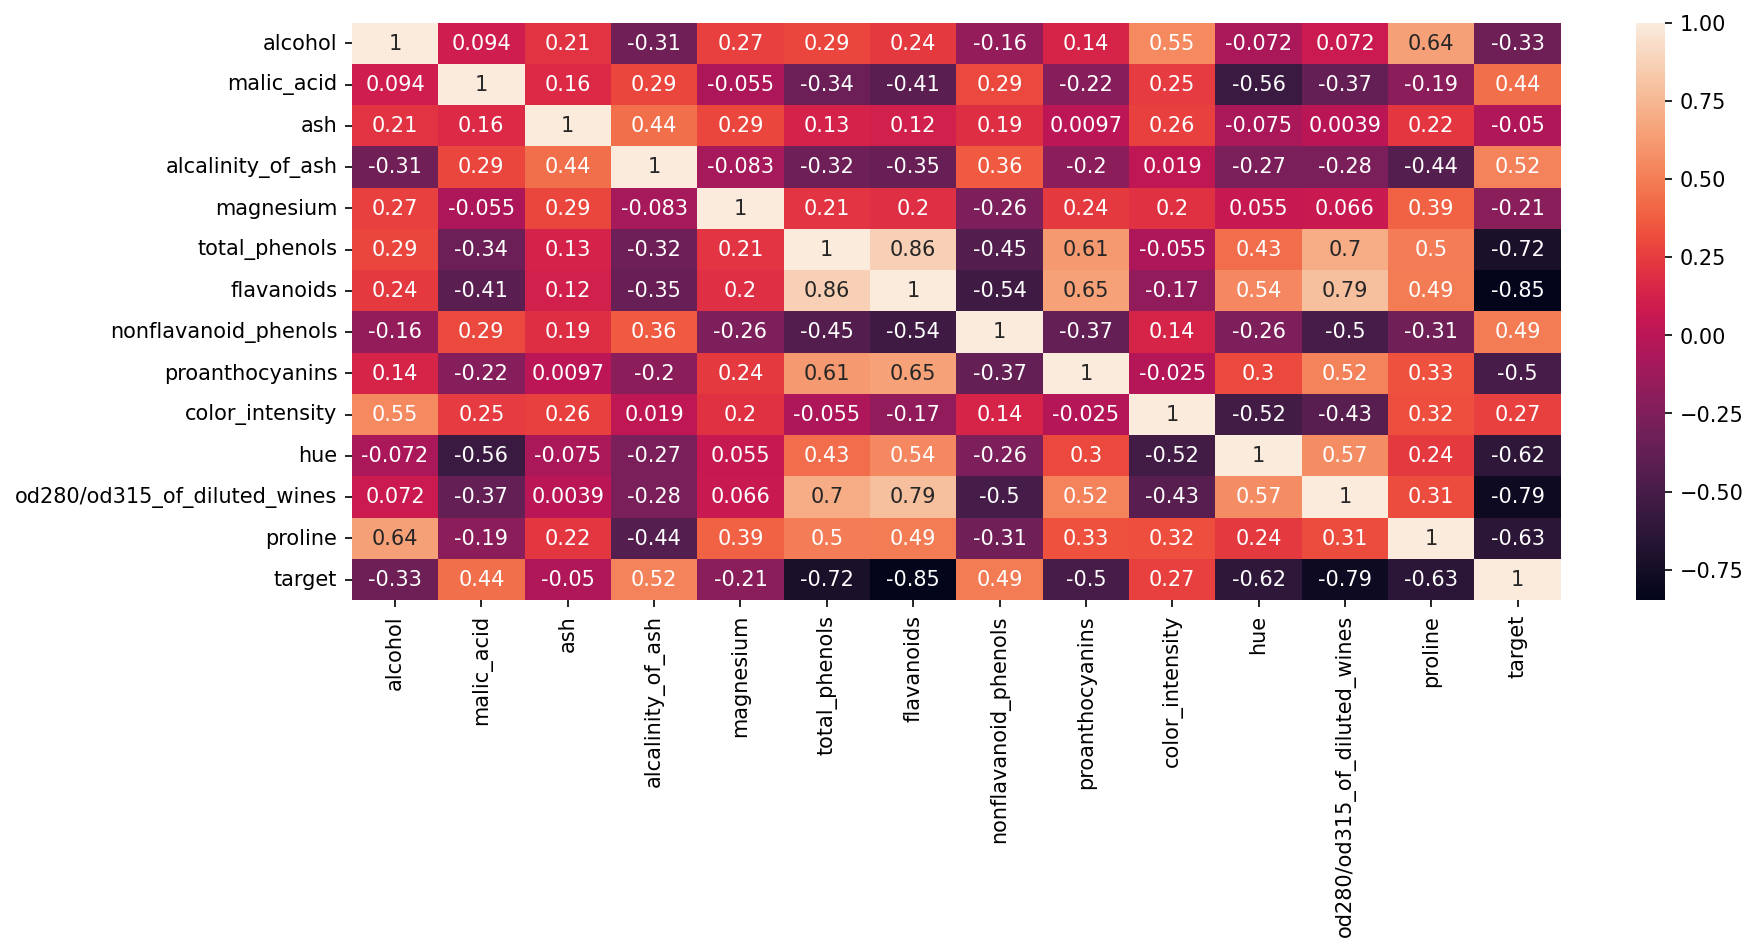

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
# hög corr, ökar tillsammans (upp till 1)
# låg corr, minskar tillsammans (till -1)
# vi vill inte ha hög corr eller låg corr
# jämför vilken som har högst/lägst mot target och behåll den som har bättre. Bättre = ? 
# om target har värden nära 0, kasta. tex ash som har -0.05 eller magnesium -0.21. Prata med domänexperten vad som ska behållas 
fig, ax = plt.subplots(1, figsize=(13,5), dpi=150)
sns.heatmap(df.corr(), annot=True) #, fmt=".1f")


In [ ]:
df.drop(columns=["ash", "total_phenols", "magnesium"], axis=1, inplace=True)
df.head()

,alcohol,malic_acid,alcalinity_of_ash,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,15.6,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,11.2,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,18.6,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,16.8,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,21.0,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


# KNN
1. dela upp dataset i X och y
2. train|test split
2. scale dataset
    - superviktigt att scala! Blir fel avstånd annars
3. Model training
    - fit och predict
4. Evaluate model
6. tune hyperparameter k (n_neighbour) with elbow plot

In [119]:
X, y = df.drop(columns="target"), df["target"]
X.head()

,alcohol,malic_acid,alcalinity_of_ash,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,15.6,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,11.2,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,18.6,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,16.8,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,21.0,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [120]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

# train|test split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42) #50% fördelning på train och test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((89, 10), (89, 10), (89,), (89,))

# scale dataset

In [125]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() #man skulle kunna använda StandardScaler också
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

print(scaled_X_train.min(), scaled_X_train.max(), scaled_X_test.min(), scaled_X_test.max())

0.0 1.0 -0.05077262693156731 1.2428256070640176


# Model training KNN
- fit och predict

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=1) #ändra till 1 neighbour, default är 5

model.fit(scaled_X_train, y_train) #fortfarande supervised learning så vi skickar in facit

y_pred = model.predict(scaled_X_test)
y_pred

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 2, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2, 0, 1, 1, 2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1, 0, 2, 1, 1, 2, 0, 0,
       0, 2, 0, 0, 1, 2, 1, 0, 2, 0, 0, 2, 1, 1, 0, 1, 0, 0, 1, 1, 0, 2,
       1])

In [129]:
y_test.values

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2, 0, 1, 1, 2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1, 0, 2, 1, 1, 2, 0, 0,
       0, 2, 0, 0, 1, 2, 1, 0, 2, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1, 0, 0, 2,
       1])

In [139]:
y_pred - y_test.values

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  0,  0,  0])

# Evaluate

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        33
           1       0.97      0.94      0.96        34
           2       0.96      1.00      0.98        22

    accuracy                           0.97        89
   macro avg       0.97      0.97      0.97        89
weighted avg       0.97      0.97      0.97        89



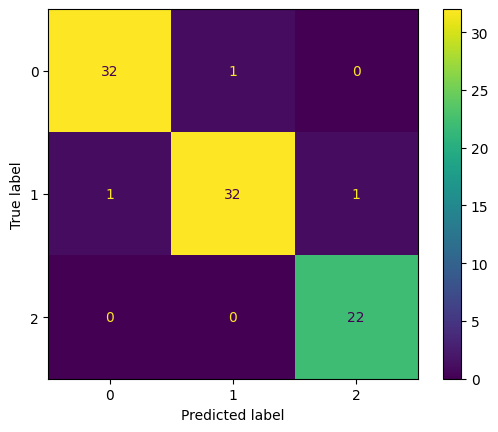

In [137]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(); #; tar bort repr comment

In [ ]:
df["target"].value_counts() # datasetet är balanserat, då kan vi använda accuracy som metric

target
1    71
0    59
2    48
Name: count, dtype: int64

## tune hyperparameter k (n_neighbour) with elbow plot


In [141]:
from sklearn.metrics import accuracy_score

error = 1-accuracy_score(y_test, y_pred)
error

0.0337078651685393

In [ ]:
error_list = []
for k in range (1,50):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(scaled_X_train, y_train)
    y_pred = model.predict(scaled_X_test)
    
    error = 1-accuracy_score(y_test, y_pred)
    error_list.append(error)

Text(0.5, 0, 'n_neighbours')

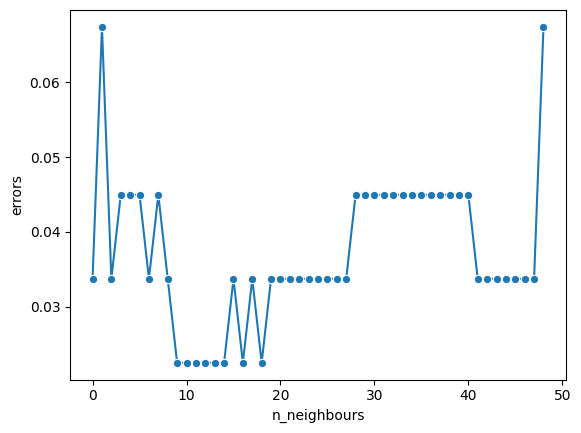

In [ ]:

sns.lineplot(error_list, marker="o", linestyle="-")
plt.ylabel("errors")
plt.xlabel("n_neighbours")
# bra att välja k=10 eller k=11 tex.


### Om du väljer k utifrån denna graf har du data leakage, därför måste du dela upp datan i en valideringsdel! 
1. choose k = 10 or k = 11 and train on all data (train and test part), save/export model
- to be more robust, do train|val|test split! use train test split twice
- calculate errors based on validation data
- choose k on elbow plot with validation data
- train on train + validation data
- evaluate on test data
- train on all data
- export model 